### Import Data

In [52]:
# !pip install kaggle
# !mkdir ~/.kaggle
# !cp kaggle.json ~/.kaggle/
# !chmod 600 ~/.kaggle/kaggle.json
# !kaggle datasets download khushipitroda/stock-market-historical-data-of-top-10-companies
# !unzip stock-market-historical-data-of-top-10-companies.zip

### **Data PreProcessing**

In [53]:
import pandas as pd
stock_data = pd.read_csv("data.csv")
stock_data.head(10)

,Company,Date,Close/Last,Volume,Open,High,Low
0,AAPL,07/17/2023,$193.99,50520160,$191.90,$194.32,$191.81
1,AAPL,07/14/2023,$190.69,41616240,$190.23,$191.1799,$189.63
2,AAPL,07/13/2023,$190.54,41342340,$190.50,$191.19,$189.78
3,AAPL,07-12-2023,$189.77,60750250,$189.68,$191.70,$188.47
4,AAPL,07-11-2023,$188.08,46638120,$189.16,$189.30,$186.60
5,AAPL,07-10-2023,$188.61,59922160,$189.26,$189.99,$187.035
6,AAPL,07-07-2023,$190.68,46815000,$191.41,$192.67,$190.24
7,AAPL,07-06-2023,$191.81,45156010,$189.84,$192.02,$189.20
8,AAPL,07-05-2023,$191.33,46920260,$191.565,$192.98,$190.62
9,AAPL,07-03-2023,$192.46,31346600,$193.78,$193.88,$191.76


In [54]:
print(stock_data.describe())
stock_data.info()

             Volume
count  2.516000e+04
mean   5.131764e+07
std    6.399143e+07
min    1.143952e+06
25%    1.200394e+07
50%    2.672083e+07
75%    6.857269e+07
max    1.065209e+09
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25160 entries, 0 to 25159
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Company     25160 non-null  object
 1   Date        25160 non-null  object
 2   Close/Last  25160 non-null  object
 3   Volume      25160 non-null  int64 
 4   Open        25160 non-null  object
 5   High        25160 non-null  object
 6   Low         25160 non-null  object
dtypes: int64(1), object(6)
memory usage: 1.3+ MB


In [55]:
stock_data.isnull().sum()

Company       0
Date          0
Close/Last    0
Volume        0
Open          0
High          0
Low           0
dtype: int64

In [56]:
stock_data.dtypes

Company       object
Date          object
Close/Last    object
Volume         int64
Open          object
High          object
Low           object
dtype: object

In [57]:
# Create DataFrame
Stock_data = pd.DataFrame(stock_data)

# Normalize the date column to the 'MM/DD/YYYY' format
Stock_data['Date'] = Stock_data['Date'].astype(str).str.replace('-', '/')
Stock_data['Date'] = pd.to_datetime(Stock_data['Date'], format='%m/%d/%Y')  # Corrected format to '%Y'


# Remove dollar signs and convert numeric columns to float
numeric_columns = ['Close/Last', 'Open', 'High', 'Low']
Stock_data[numeric_columns] = Stock_data[numeric_columns].replace('[\$,]', '', regex=True).astype(float)

# Create a mapping dictionary for company abbreviations to real names
company_mapping = {
    'AAPL': 'Apple',
    'AMZN': 'Amazon',
    'SBUX': 'Starbucks',
    'MSFT': 'Microsoft',
    'CSCO': 'Cisco Systems',
    'QCOM': 'Qualcomm',
    'META': 'META',
    'TSLA': 'Tesla',
    'NFLX' : 'Netflix'
}

# Replace the company abbreviations with real names
Stock_data['Company'] = Stock_data['Company'].replace(company_mapping)

# Display the updated DataFrame
print(Stock_data)
print(stock_data.dtypes)

       Company       Date  Close/Last    Volume      Open      High       Low
0        Apple 2023-07-17    193.9900  50520160  191.9000  194.3200  191.8100
1        Apple 2023-07-14    190.6900  41616240  190.2300  191.1799  189.6300
2        Apple 2023-07-13    190.5400  41342340  190.5000  191.1900  189.7800
3        Apple 2023-07-12    189.7700  60750250  189.6800  191.7000  188.4700
4        Apple 2023-07-11    188.0800  46638120  189.1600  189.3000  186.6000
...        ...        ...         ...       ...       ...       ...       ...
25155  Netflix 2013-07-24     34.4714  33395351   35.6743   36.0357   34.3143
25156  Netflix 2013-07-23     35.7514  76792963   35.9143   37.4621   35.1714
25157  Netflix 2013-07-22     37.4228  44791095   38.1214   38.3928   36.7314
25158  Netflix 2013-07-19     37.7966  18098750   38.2043   38.2784   37.5971
25159  Netflix 2013-07-18     38.0586  20418642   38.6157   38.6157   37.7143

[25160 rows x 7 columns]
Company               object
Date     

## Stock Analysis

In [58]:
!pip install dash
from dash import Dash, dcc, html, Input, Output
import plotly.express as px

app = Dash(__name__)


app.layout = html.Div([
    html.H4('Stock price analysis'),
    dcc.Graph(id="time-series-chart"),
    html.P("Select stock:"),
    dcc.Dropdown(
        id="ticker",
        options=["Amazon", "Tesla", "Netflix","META","Microsoft"],
        value="Amazon",
        clearable=False,
        style={'width': '150px'}
    ),
])

@app.callback(
    Output("time-series-chart", "figure"),
    Input("ticker", "value"))
def display_time_series(ticker):
    company_data = Stock_data[Stock_data['Company'] == ticker]
    fig = px.line(company_data, x='Date', y='Close/Last', title=f'{ticker} Stock Price')
    fig.update_layout(title_x=0.5,width=1000,height=500 )

    return fig


if __name__ == '__main__':
    app.run_server(debug=True)


[notice] A new release of pip is available: 23.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [59]:
import plotly.express as px

# Reshape the data into long-form format
melted_data = Stock_data.melt(id_vars=['Company', 'Date'], value_vars=['Close/Last'], var_name='Attribute', value_name='Value')
# Create the area plot with subplots
fig = px.area(melted_data, x='Date', y='Value', facet_col="Company", facet_col_wrap=2, line_shape="linear",color="Company")

# Customize the plot layout
fig.update_layout(title='Stock Prices for Different Companies', xaxis_title='Date', yaxis_title='Close/Last')
fig.update_layout(title_x=0.5)

# Show the plot
fig.show()

In [60]:
import plotly.express as px
# Assuming your 'Date' column is in datetime format
Stock_data['Year'] = Stock_data['Date'].dt.year

# Group the data by year and calculate the mean 'Close/Last' value for each year
grouped_data = Stock_data.groupby(['Year', 'Company'])['Close/Last'].mean().reset_index()

fig = px.line(grouped_data, x="Year", y="Close/Last", color="Company",
              hover_data=["Year", "Company", "Close/Last"],
              title='Custom Tick Labels')
fig.update_layout(title_x=0.5,width=900,height=500 )
fig.update_xaxes(
    dtick="Y1",
    tickformat="%Y")  # Use "%Y" to display only the year

fig.show()

In [61]:
import plotly.express as px
# Filter data for the year 2023
Stock_data_2023 = Stock_data[Stock_data['Date'].dt.year == 2023]
Stock_data_2023['Profit'] = Stock_data_2023['Close/Last'] - Stock_data_2023['Open']

# Group the data by 'Company' and calculate the sum of 'Profit' for each company
profit_data = Stock_data_2023.groupby('Company')['Profit'].sum().reset_index()

# Create a bar plot for company profits
fig = px.bar(profit_data, x='Company', y='Profit', title='Company Stock Market Share Prices profits (2023)',color='Company')

# Center the title
fig.update_layout(title_x=0.5)

fig.update_xaxes(title_text='Company')
fig.update_yaxes(title_text='Profit')
# Set custom width and height
fig.update_layout(
    title_x=0.5,  # Center the title
    xaxis_title_text='Company',
    yaxis_title_text='Profit',
    width=900,     # Set custom width
    height=500     # Set custom height
)
fig.show()

C:\Users\MSI-PC\AppData\Local\Temp\ipykernel_7532\4237428019.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



### **Annualized_Volatility**

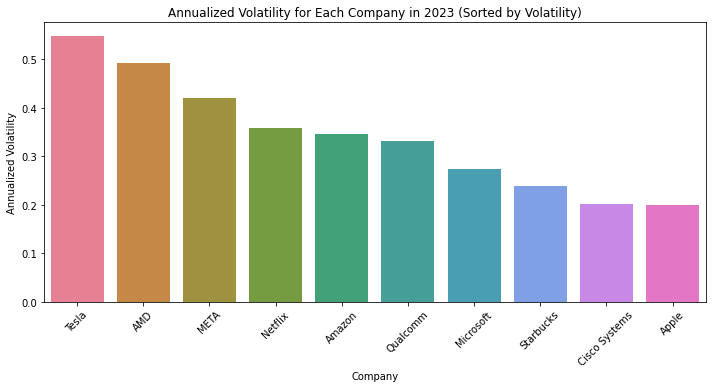

In [62]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Convert 'Date' column to datetime
Stock_data['Date'] = pd.to_datetime(Stock_data['Date'])

# Filter data for the year 2023
Stock_data_2023 = Stock_data[Stock_data['Date'].dt.year == 2023].copy()  # Make a copy to avoid SettingWithCopyWarning

# Calculate daily returns for each company in 2023
Stock_data_2023['Daily_Return'] = Stock_data_2023.groupby('Company')['Close/Last'].pct_change()

# Calculate daily volatility for each company in 2023
Stock_data_2023['Daily_Volatility'] = Stock_data_2023.groupby('Company')['Daily_Return'].transform('std')

# Assuming 252 trading days in a year, annualize volatility for 2023
trading_days_per_year = 252
Stock_data_2023['Annualized_Volatility'] = Stock_data_2023['Daily_Volatility'] * np.sqrt(trading_days_per_year)

# Sort data by annualized volatility in descending order
Stock_data_2023.sort_values(by='Annualized_Volatility', ascending=False, inplace=True)  # Use inplace=True to modify the DataFrame in place

# Create a color palette with different colors for each company
palette = sns.color_palette('husl', n_colors=len(Stock_data_2023['Company'].unique()))

# Create a bar plot for each company and annualized volatility in 2023
plt.figure(figsize=(10, 5.5))
sns.barplot(data=Stock_data_2023, x='Company', y='Annualized_Volatility', palette=palette)
plt.xlabel('Company')
plt.ylabel('Annualized Volatility')
plt.title('Annualized Volatility for Each Company in 2023 (Sorted by Volatility)')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the bar plot
plt.show()

### **correlation matrix**

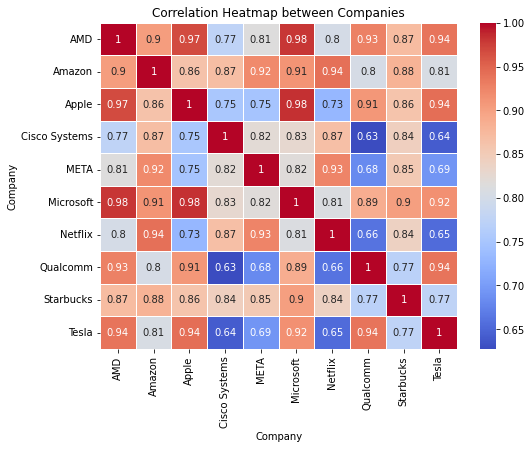

In [63]:
# Calculate the correlation matrix between companies

# Pivot the DataFrame to have companies as columns and Date as the index
pivot_df = Stock_data.pivot(index='Date', columns='Company', values='Close/Last')

# Calculate the correlation matrix
correlation_matrix = pivot_df.corr()

# Create a correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap between Companies')
plt.show()


## **Linear Regression Model**

### Model Selection and Training

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

X = Stock_data[['Company','Volume','Open','High','Low']]  # Features
y = Stock_data['Close/Last']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train)

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Fit and transform the 'Company' column in X_train
X_train['Company'] = label_encoder.fit_transform(X_train['Company'])

# Apply the same encoding to X_test
X_test['Company'] = label_encoder.transform(X_test['Company'])

print(X_train)
# Initialize the model
model= LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)


         Company     Volume      Open      High       Low
20472        AMD  118354500  115.4700  119.4800  113.3100
10263   Qualcomm   11321160  118.5800  120.4500  117.7800
24204    Netflix    3926516  156.2900  156.5400  154.8800
17787      Tesla   62688820  234.0500  237.3951  227.2800
23777    Netflix   10460420  334.2400  335.4800  329.1300
...          ...        ...       ...       ...       ...
21575        AMD   69522200   13.8500   14.3700   13.8100
5390   Microsoft   31284670  309.8650  311.9300  307.3900
860        Apple   94747560   81.0475   81.5550   80.8375
15795     Amazon  112261960  157.6815  159.7898  156.1500
23654    Netflix    4336287  381.1000  384.5400  378.8000

[20128 rows x 5 columns]
       Company     Volume      Open      High       Low
20472        0  118354500  115.4700  119.4800  113.3100
10263        7   11321160  118.5800  120.4500  117.7800
24204        6    3926516  156.2900  156.5400  154.8800
17787        9   62688820  234.0500  237.3951  227.280

LinearRegression()

### Model Evaluation

In [65]:
y_pred = model.predict(X_test)

### Visualize the predictions

In [66]:
# Display the predicted and true values for the test set with € sign 3l4an ana gamed awy
data = []
for  pred, true in zip( y_test , y_pred):
    data.append({ 'True Value': round(pred), 'Predicted Value': round(true)})
data = pd.DataFrame(data)

def convert_value(value):
    if value >= 1000000:
        return f'${value/1000000:.2f}M'
    elif value >= 1000:
        return f'${value/1000:.2f}K'
    else:
        return f'${value:.0f}'

data['Predicted Value'] = data['Predicted Value'].apply(convert_value)
data['True Value'] = data['True Value'].apply(convert_value)
print("The Length of testing data : " + str(len(data)))
data

The Length of testing data : 5032


,True Value,Predicted Value
0,$44,$41
1,$142,$142
2,$51,$51
3,$44,$44
4,$74,$74
...,...,...
5027,$13,$13
5028,$96,$96
5029,$10,$10
5030,$289,$289


### Evaluate the model's performance


In [67]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared (R2) Score: { round(r2*100,2)}%")

Mean Squared Error: 1.6623001448941328
R-squared (R2) Score: 99.98%


# THANKS :)